# Ada boost

## Spl - Thanks(Credits)
- https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

"Adaboost is one of the earliest implementations of the boosting algorithm. 

It forms the base of other boosting algorithms, like gradient boosting and XGBoost.

AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning.

It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances."


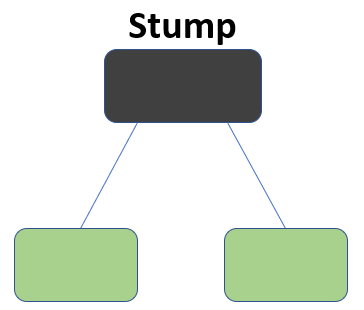

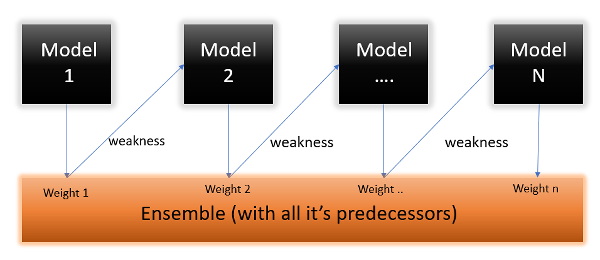

# 1. Import Python Necessay Modules

In [56]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import numpy as np

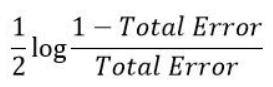

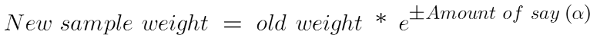

# 2. Write Ada Boost Model for Classification

In [57]:
cla_models = []
cla_alphas = []

def adaboost_model_classification(X,Y,n_estimators=5):
    n_samples, n_features = X.shape
    weights = np.ones(n_samples) / n_samples

    for _ in range(n_estimators):
        model = DecisionTreeClassifier(max_depth=1)
        model.fit(X, Y, sample_weight=weights)
        predictions = model.predict(X)

        error = np.sum(weights * (predictions != Y))

        alpha = 0.5 * np.log((1 - error) / (error + 1e-10))
        cla_alphas.append(alpha)

        weights *= np.exp(-alpha * Y * predictions)
        weights /= np.sum(weights)

        cla_models.append(model)
        
def adaboost_model_classification_predict(X):
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)

    for alpha, model in zip(cla_alphas, cla_models):
        predictions += alpha * model.predict(X)

    return np.sign(predictions)

# 3. Invoke - Call - Ada Boost - Model- Verification

In [58]:
    # Create synthetic data
X, Y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
adaboost_model_classification(X_train,Y_train,n_estimators=100)

# Make predictions on the testing set
y_train_pred = adaboost_model_classification_predict(X_train)
accuracy = accuracy_score(Y_train, y_train_pred)
print("Train Accuracy:", accuracy)

# Make predictions on the testing set
y_pred = adaboost_model_classification_predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)



Train Accuracy: 0.87625
Test Accuracy: 0.86
